In [1]:
%matplotlib inline
import json
import urllib2
import os
from tables import open_file
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from alleninf.api import get_probes_from_genes
from alleninf.data import get_values_at_locations
from alleninf.api import get_mni_coordinates_from_wells#
from alleninf.analysis import fixed_effects, approximate_random_effects, bayesian_random_effects
sns.set_style('white')
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 999

api_url = "http://api.brain-map.org/api/v2/data/query.json"
ahba_dir  = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG5/AHBA2'
save_fig_dir        = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v2'


In [2]:
def detect_outlier_subjects(df,measure,m=2):
    upper = np.mean(df[measure]) + m * np.std(df[measure])
    lower = np.mean(df[measure]) - m * np.std(df[measure])

    for subject in df.index:
        if df.loc[subject][measure] > upper:
            print subject
        elif df.loc[subject][measure] < lower:
            print subject

In [3]:
df_iron   = pd.read_csv(os.path.join(ahba_dir, 'AHBA_iron_homeostasis.csv'),index_col =0)
df_iron_d = pd.read_csv(os.path.join(ahba_dir, 'AHBA_iron_downreg.csv'),index_col =0)
df_da     = pd.read_csv(os.path.join(ahba_dir, 'AHBA_dopamine.csv'),index_col =0)
df_anmc   = pd.read_csv(os.path.join(ahba_dir, 'AHBA_anmc.csv'),index_col =0)

df_tf  = pd.read_csv(os.path.join(ahba_dir, 'AHBA_bio_tf.csv'),index_col =0)
df_hfe = pd.read_csv(os.path.join(ahba_dir, 'AHBA_bio_hfe.csv'),index_col =0)
df_slc = pd.read_csv(os.path.join(ahba_dir, 'AHBA_bio_slc.csv'),index_col =0)
df_fth = pd.read_csv(os.path.join(ahba_dir, 'AHBA_bio_fth.csv'),index_col =0)
df_all = pd.read_csv(os.path.join(ahba_dir, 'AHBA_bio_all.csv'),index_col =0)

In [4]:
df  = pd.DataFrame(index = df_iron.index, 
                    columns = ['iron', 'da', 'glu', 'gaba', 'anmc', 
                               'tf', 'hfe', 'slc', 'fth', 'bio',
                               'top_struct', 'struct'])
df['top_struct'] = df_iron.top_struct
df['struct']     = df_iron.struct_name
df['mni']        = list(zip(df_iron.corrected_mni_x,df_iron.corrected_mni_y,df_iron.corrected_mni_z))
df['iron']       = df_iron.PCA
df['iron_d']     = df_iron_d.PCA
df['da']         = df_da.PCA
df['anmc']       = df_anmc.PCA
df['tf']         = df_tf.PCA
df['hfe']        = df_hfe.PCA
df['slc']        = df_slc.PCA
df['fth']        = df_fth.PCA
df['bio']        = df_all.PCA

In [5]:
mni_coords = get_mni_coordinates_from_wells(df.index)

In [9]:
mni_coords[0:3]

[Pandas(corrected_mni_x=29.911739189999999, corrected_mni_y=-2.115836458, corrected_mni_z=46.858706499999997),
 Pandas(corrected_mni_x=-34.143678960000003, corrected_mni_y=3.1151010299999999, corrected_mni_z=53.592670679999998),
 Pandas(corrected_mni_x=63.768604549999999, corrected_mni_y=-40.606922769999997, corrected_mni_z=-27.030653539999999)]

In [10]:
df['mni'][0:3]

1001      (29.91173919, -2.115836458, 46.8587065)
1002      (-34.14367896, 3.11510103, 53.59267068)
1003    (63.76860455, -40.60692277, -27.03065354)
Name: mni, dtype: object

In [22]:
package_directory = '/Users/kanaan/SCR/Github/alleninf/alleninf'
mni           = pd.read_csv(os.path.join(package_directory, "data", "corrected_mni_coordinates.csv"), header=0, index_col=0)
mni['coords'] = list(zip(mni.corrected_mni_x,mni.corrected_mni_y,mni.corrected_mni_z))

mni.sort_index()

,corrected_mni_x,corrected_mni_y,corrected_mni_z,coords
97,7.836806,61.216223,-21.714255,"(7.836806172, 61.21622321, -21.71425538)"
98,-6.859037,-94.583095,-19.850044,"(-6.859036731, -94.5830945, -19.85004402)"
99,-32.266331,57.749746,-6.910197,"(-32.26633119, 57.74974564, -6.910197113)"
105,32.368624,-68.059548,59.065810,"(32.36862417, -68.05954819, 59.06580988)"
106,-7.930885,-94.489135,-19.942669,"(-7.930884984, -94.48913488, -19.94266907)"
107,7.763791,51.465317,-28.264999,"(7.763791245, 51.46531727, -28.26499943)"
113,10.860019,-69.996138,49.663779,"(10.86001932, -69.99613846, 49.66377945)"
114,26.395434,62.813164,2.545819,"(26.39543391, 62.81316391, 2.545819323)"
115,2.070709,51.273087,-28.066471,"(2.070708939, 51.27308718, -28.06647111)"
121,3.813527,-68.003613,38.198271,"(3.813527197, -68.00361349, 38.19827128)"


In [21]:
pd.read_csv('/Users/kanaan/SCR/workspace/MNI_NIFTI_VALUES.csv', index_col=0).head()

,corrected_mni_x,corrected_mni_y,corrected_mni_z,mni_coords,SUBCORTICAL_CP
well_id,,,,,
126439333,-13.467693,2.255686,3.432523,"(-13.467692624176099, 2.2556863621849201, 3.43...",0.712495
126432538,-53.603259,-8.120055,0.868643,"(-53.603259238745785, -8.12005526025591, 0.868...",NaN
126435762,-16.288739,-34.198856,-19.944686,"(-16.2887392340876, -34.198856409531899, -19.9...",NaN
126439285,-17.820212,3.595613,-32.872868,"(-17.820211862154199, 3.5956125920259701, -32....",NaN
126435744,-23.726456,-25.139000,-16.692841,"(-23.7264555931642, -25.138999524959399, -16.6...",NaN


In [6]:
def plot_qs_ahba(roi, geneset):

    nifti_img = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG5/AHBA/QSM_MEAN/THR/%s.nii.gz'%roi
    nifti_values = get_values_at_locations(nifti_file = nifti_img, 
                                           locations= mni_coords, 
                                           radius=2, 
                                           verbose=True)

    g = sns.jointplot(np.array(nifti_values), df[geneset], kind = 'reg', size=7)
    g.fig.suptitle(roi)


In [7]:
rois = [#'MEAN_lemon_BG', 'MEAN_lemon_BS', 'MEAN_lemon_Caud_Puta','MEAN_lemon_L_BG', 'MEAN_lemon_L_BS',
        #'MEAN_lemon_L_Caud_Puta', 'MEAN_lemon_R_BG', 'MEAN_lemon_R_BS', 'MEAN_lemon_R_Caud_Puta', 
        #'MEAN_lemon_STR3_EXEC', 'MEAN_lemon_STR3_LIMBIC','MEAN_lemon_STR3_MOTOR', 'MEAN_lemon_SUBCORTICAL'
        'MEAN_lemon_Caud_Puta'
        ]

No mask provided - using implicit (not NaN, not zero) mask


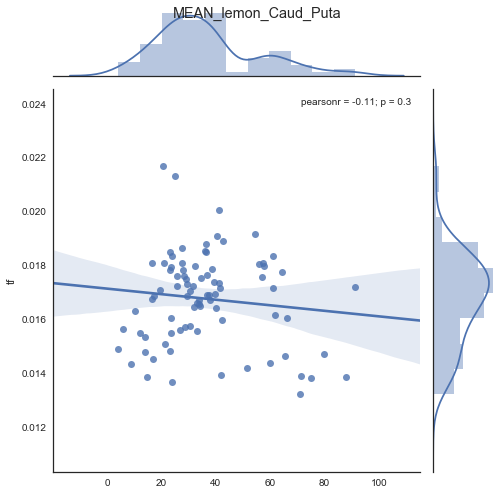

In [8]:
for roi in rois:
    plot_qs_ahba(roi, 'tf')

In [9]:
nifti_img = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG5/AHBA/QSM_MEAN/MEAN_lemon_BG.nii.gz'
mean_bg = get_values_at_locations(nifti_file = nifti_img, 
                                       locations= mni_coords, 
                                       radius=2, 
                                       verbose=True)


No mask provided - using implicit (not NaN, not zero) mask


In [ ]:
nifti_img = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG5/AHBA/THR/.nii.gz'
mean_bg = get_values_at_locations(nifti_file = nifti_img, 
                                       locations= mni_coords, 
                                       radius=2, 
                                       verbose=True)


In [71]:
drop_nii = [13682,
13747,
13769,
139379890,
160091917,
]
drop_nii = [1053,
11270,
11317,
127686973,
127687121,
159226093,
159439025,
2322,
3026
]
drop_nii =[1037,
1053,
11270,
11317,
1138,
1145,
126431643,
127686973,
127687121,
13929,
157772954,
159439121,
2596,
3026,
5018]

drop_nii=[]

df  = pd.DataFrame(index = df_iron.index, 
                    columns = ['iron', 'da', 'glu', 'gaba', 'anmc', 
                               'tf', 'hfe', 'slc', 'fth', 'bio',
                               'top_struct', 'struct'])
m = ['Median']
df['top_struct'] = df_iron.top_struct
df['struct']     = df_iron.struct_name
df['mni']        = list(zip(df_iron.corrected_mni_x,df_iron.corrected_mni_y,df_iron.corrected_mni_z))
df['iron']       = df_iron[m]
df['iron_d']     = df_iron_d[m]
df['da']         = df_da[m]
df['anmc']       = df_anmc[m]
df['tf']         = df_tf[m]
df['hfe']        = df_hfe[m]
df['slc']        = df_slc[m]
df['fth']        = df_fth[m]
df['bio']        = df_all[m]


def plot(df,nii,drop):
    df_nii = pd.DataFrame(index = df.index, columns = ['nifti'])
    df_nii['nifti'] = nii
    dfx = pd.concat([df,df_nii],axis=1)
    
    return dfx.drop(drop,axis=0).reset_index()

dfx = plot(df, mean_bg, drop_nii)


In [72]:
nifti_img

'/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/AUG5/AHBA/QSM_MEAN/MEAN_lemon_BG.nii.gz'

In [73]:
detect_outlier_subjects(df_fth, 'PCA',3)

1037
1053
11270
11317
1138
1145
126431643
127686973
127687121
13929
157772954
159439121
2596
3026
5018


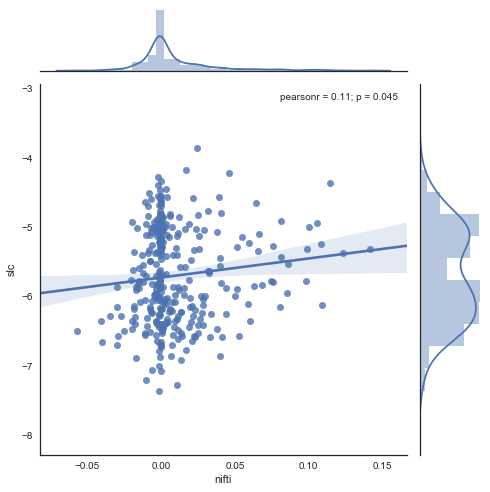

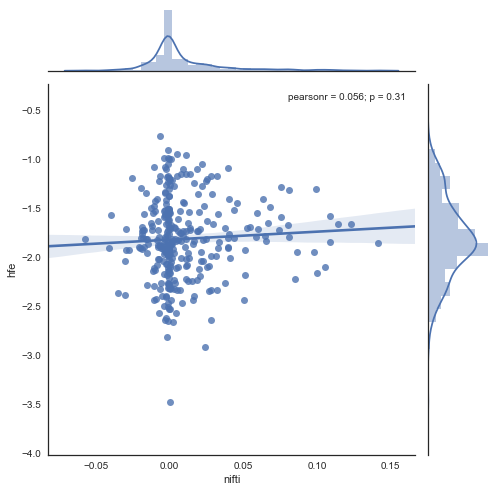

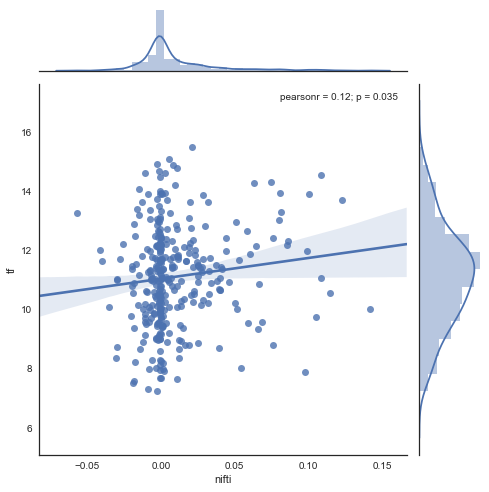

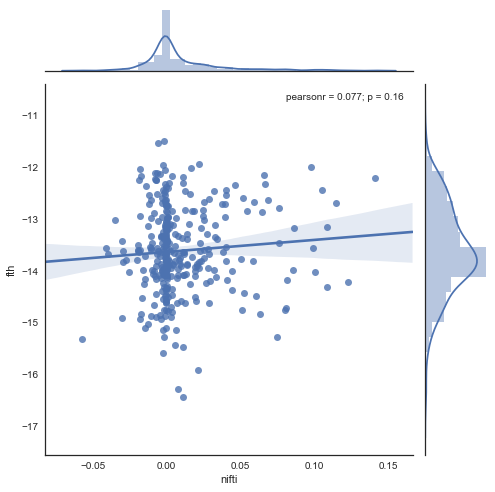

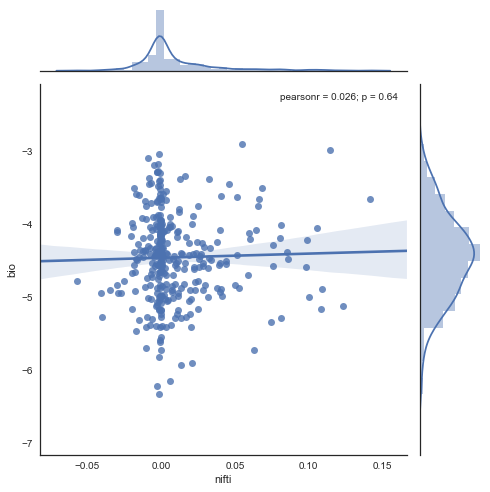

In [74]:
sns.jointplot(dfx.nifti, dfx.slc * -1, kind = 'reg', size=7)
sns.jointplot(dfx.nifti, dfx.hfe * -1, kind = 'reg', size=7)
sns.jointplot(dfx.nifti, dfx.tf , kind = 'reg', size=7)
sns.jointplot(dfx.nifti, dfx.fth * -1 , kind = 'reg', size=7)
sns.jointplot(dfx.nifti, dfx.bio *-1, kind = 'reg', size=7)

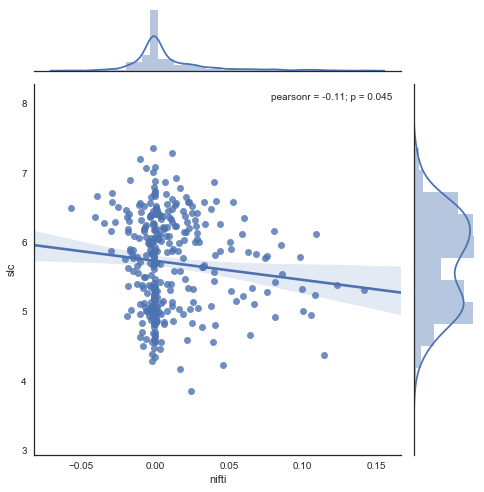

In [77]:
sns.jointplot(dfx.nifti.dropna(), dfx.slc, kind = 'reg', size=7)


In [ ]:
sns.distplot(dfx.nifti.dropna())

In [ ]:
sns.distplot(np.log10(dfx.nifti.dropna()).dropna())

In [52]:
np.log10(dfx.nifti.dropna()).dropna()

/Users/kanaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


175    -1.815089
185    -1.949955
190    -1.468537
227    -1.421374
247    -1.553840
248    -2.106421
250    -1.574392
251    -1.355186
253    -1.290536
257    -2.500265
258    -1.857739
263    -1.546084
266    -2.243165
267    -1.933520
270    -1.567444
271    -2.758240
273    -2.271316
274    -1.664623
277    -1.955254
315    -2.882673
351    -1.599078
362    -1.527587
601    -2.207943
665    -2.101810
670    -1.336604
680    -1.425076
681    -0.849379
682    -1.907000
693    -1.783127
695    -1.394620
698    -1.189855
702    -2.455121
703    -1.176051
707    -1.665637
708    -1.498154
711    -1.182122
712    -1.089931
717    -0.977003
719    -1.962869
723    -0.941081
724    -1.397828
732    -2.436606
781    -2.694981
813    -1.288609
816    -1.165339
819    -1.009271
821    -1.796957
824    -1.908868
831    -1.398045
834    -1.094627
844    -1.859690
851    -3.641134
861    -2.026847
892    -1.988878
897    -3.157988
901    -2.038791
953    -1.722176
965    -1.859718
992    -3.0851